## SIMPLEPLOT

Estudiante: Pierina Milla

### 4. Keep the maps for one country: Peru

In [45]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [46]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [47]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [48]:
peru=countries[countries.COUNTRY=='Peru']

In [49]:
import matplotlib.pyplot as plt

<Axes: >

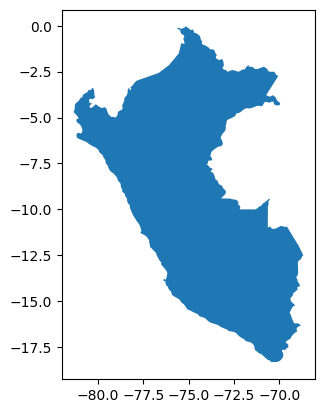

In [50]:
peru.plot()

In [51]:
cities.head()

,NAME,COUNTRY,CAPITAL,geometry
0,Murmansk,Russia,N,POINT (33.08604 68.96355)
1,Arkhangelsk,Russia,N,POINT (40.64616 64.52067)
2,Saint Petersburg,Russia,N,POINT (30.45333 59.95189)
3,Magadan,Russia,N,POINT (150.78001 59.57100)
4,Perm',Russia,N,POINT (56.23246 58.00024)


In [52]:
cities_peru=cities[cities.COUNTRY=='Peru']

<Axes: >

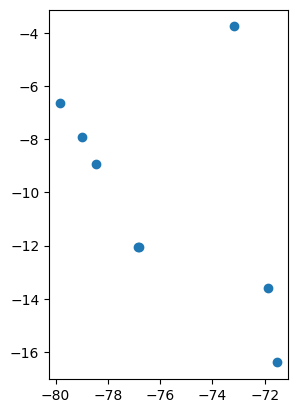

In [53]:
cities_peru.plot()

In [54]:
rivers.head()

,NAME,SYSTEM,geometry
0,Aldan,Lena,"LINESTRING (124.00678 56.47258, 123.25956 56.6..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.27730 -3.60706, -60.6846..."
2,Amu Darya,None,"LINESTRING (73.98818 37.49952, 73.52595 37.528..."
3,Amur,None,"LINESTRING (122.63956 49.99730, 120.47874 49.2..."
4,Angara,None,"LINESTRING (105.07841 51.93053, 103.92959 51.7..."


In [55]:
rivers_peru = gpd.clip(gdf=rivers,mask=peru)

<Axes: >

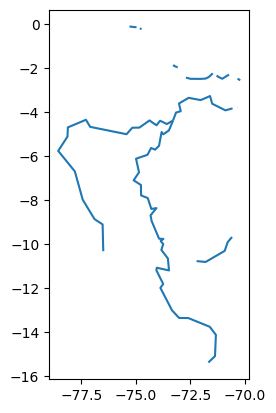

In [56]:
rivers_peru.plot()

<Axes: >

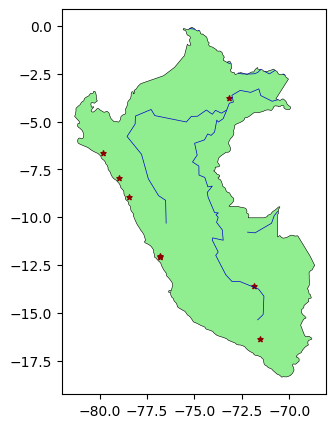

In [57]:
base = peru.plot(facecolor="lightgreen", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_peru.plot(marker='*', color='darkred', markersize=15,ax=base)
rivers_peru.plot(edgecolor='mediumblue', linewidth=0.5,ax=base)

### 5. Find the right CRS for each map

In [58]:
peru.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
cities_peru.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
rivers_peru.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Como CRS actual no está proyectado, se encontrará el CRS correcto para Perú

In [61]:
peru.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [62]:
peru.to_crs(24891).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [63]:
peru.to_crs(24891).centroid

172    POINT (893956.209 1073003.180)
dtype: geometry

Guardamos los cambios

In [64]:
peru_24891=peru.to_crs(24891)

In [65]:
peru_24891.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [66]:
#cities_24891=cities_peru.to_crs(24891)
#cities_24891.crs

In [67]:
cities_24891=cities_peru.to_crs(peru_24891.crs)
rivers_24891=rivers_peru.to_crs(peru_24891.crs)

In [68]:
cities_24891.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [69]:
rivers_24891.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

### 6. Plotting the proyected maps

#### 6.1 Ploteo de cada uno

<Axes: >

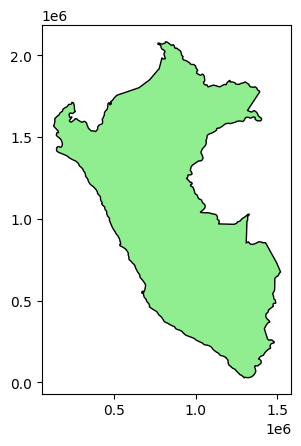

In [70]:
peru_24891.plot(facecolor="lightgreen", edgecolor='black')

<Axes: >

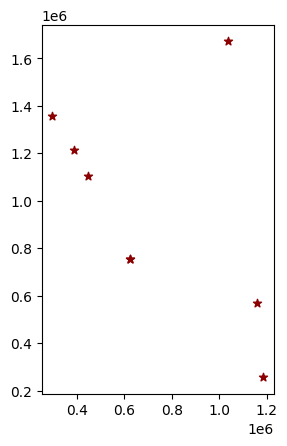

In [71]:
cities_24891.plot(marker='*', color='darkred')

<Axes: >

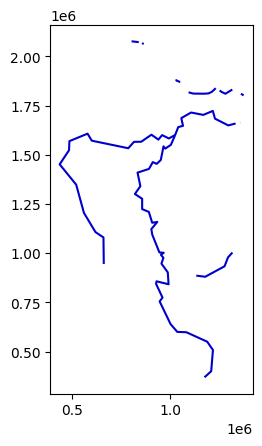

In [72]:
rivers_24891.plot(edgecolor='mediumblue')

#### 6.2 All together

<Axes: >

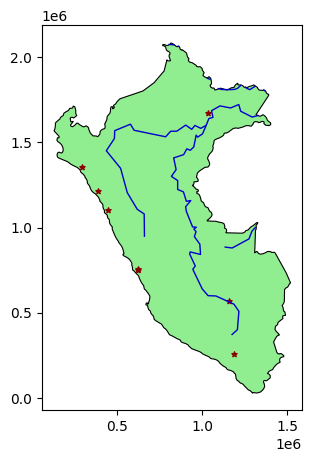

In [73]:
base = peru_24891.plot(facecolor="lightgreen", edgecolor='black', linewidth=0.8,figsize=(5,5))
cities_24891.plot(marker='*', color='darkred', markersize=15,ax=base)
rivers_24891.plot(edgecolor='mediumblue', linewidth=1,ax=base)

#### 6.3 All together iteractivily

In [74]:
peruCoord=[-9.189967, -75.015152]

In [75]:
import folium

In [76]:
m = cities_24891.explore(location=peruCoord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers_24891.explore(m=m, color="blue",
                   name="rivers")#optional
# folium.LayerControl().add_to(m) #optional
m

### 7. Save the NON interactive map as an image

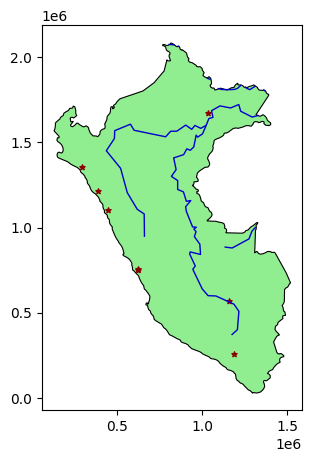

In [77]:
base = peru_24891.plot(facecolor="lightgreen", edgecolor='black', linewidth=0.8,figsize=(5,5))
cities_24891.plot(marker='*', color='darkred', markersize=15,ax=base)
mapPeru=rivers_24891.plot(edgecolor='mediumblue', linewidth=1,ax=base)
plt.savefig(os.path.join("image",'mapPeru.jpg'))

### 8. Save the reproyected maps into one geopackage file

In [78]:
peru_24891.to_file(os.path.join("maps","peru_24891","peruMaps.gpkg"), layer='country', driver="GPKG")
cities_24891.to_file(os.path.join("maps","peru_24891","peruMaps.gpkg"), layer='cities', driver="GPKG")
rivers_24891.to_file(os.path.join("maps","peru_24891","peruMaps.gpkg"), layer='rivers', driver="GPKG")

### 9. Get the link for the geopackage and make sure it is working well 

Obtenemos el archivo gpck con el link a Github

In [79]:
peruMapsLink = 'https://github.com/IntroSpatialDataScience/simpleplot/raw/main/maps/peru_24891/peruMaps.gpkg'

In [80]:
from  fiona import listlayers
listlayers(peruMapsLink)

['country', 'cities', 'rivers']

In [81]:
peru=gpd.read_file(peruMapsLink,layer='country')
cities_peru=gpd.read_file(peruMapsLink,layer='cities')
rivers_peru=gpd.read_file(peruMapsLink,layer='rivers')

Comprobamos si está trabajando bien:

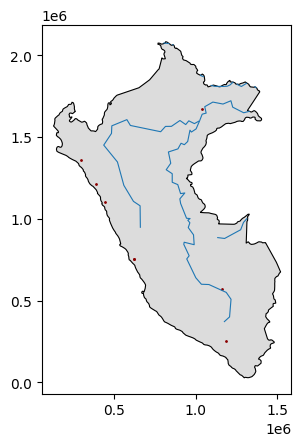

In [82]:
base = peru.plot(facecolor='gainsboro',edgecolor='black',linewidth=0.8)
cities_peru.plot(ax=base, markersize=1, color='darkred') 
rivers_peru.plot(ax=base, linewidth=0.8)
plt.show()